In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt


In [11]:
file_path = r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\updated_data.csv"
df = pd.read_csv(file_path)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtToIncome,AgeGroup_31-45,AgeGroup_46-60,AgeGroup_60+,UtilizationBand_Medium,UtilizationBand_High,UtilizationBand_Very High,DependentsRisk_Medium,DependentsRisk_High
0,1,0.766127,45,2,0.802982,9.118335,13,0,6,0,2.0,0.000088,True,False,False,False,True,False,True,False
1,0,0.957151,40,0,0.121876,7.863651,4,0,0,0,1.0,0.000047,True,False,False,False,True,False,False,False
2,0,0.658180,38,1,0.085113,8.020599,2,1,0,0,0.0,0.000028,True,False,False,True,False,False,False,False
3,0,0.233810,30,0,0.036050,8.101981,5,0,0,0,0.0,0.000011,False,False,False,False,False,False,False,False
4,0,0.907239,49,1,0.024926,9.445136,7,0,1,0,0.0,0.000002,False,True,False,False,True,False,False,False


In [12]:
X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

In [14]:
# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(class_weight="balanced", max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict and calculate AUC
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
log_preds = log_model.predict(X_test_scaled)
log_auc = roc_auc_score(y_test, log_probs)
print("Logistic Regression AUC:", round(log_auc, 4))


Logistic Regression AUC: 0.8315


In [15]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = rf_model.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest AUC:", round(rf_auc, 4))


Random Forest AUC: 0.8639


In [16]:
# XGBoost
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric="auc",
    random_state=42
)
xgb_model.fit(X_train, y_train)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_preds = xgb_model.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb_probs)
print("XGBoost AUC:", round(xgb_auc, 4))


XGBoost AUC: 0.8656


In [17]:
# LightGBM
lgb_model = LGBMClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42
)
lgb_model.fit(X_train, y_train)

lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
lgb_preds = lgb_model.predict(X_test)
lgb_auc = roc_auc_score(y_test, lgb_probs)
print("LightGBM AUC:", round(lgb_auc, 4))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7018, number of negative: 97982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1240
[LightGBM] [Info] Number of data points in the train set: 105000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [18]:
# predictions DataFrames
# Logistic Regression
log_results = X_test.copy()
log_results['Actual'] = y_test
log_results['Predicted_Prob'] = log_probs
log_results['Predicted_Class'] = log_preds

# Random Forest
rf_results = X_test.copy()
rf_results['Actual'] = y_test
rf_results['Predicted_Prob'] = rf_probs
rf_results['Predicted_Class'] = rf_preds

# XGBoost
xgb_results = X_test.copy()
xgb_results['Actual'] = y_test
xgb_results['Predicted_Prob'] = xgb_probs
xgb_results['Predicted_Class'] = xgb_preds

# LightGBM
lgb_results = X_test.copy()
lgb_results['Actual'] = y_test
lgb_results['Predicted_Prob'] = lgb_probs
lgb_results['Predicted_Class'] = lgb_preds


In [19]:
# convwert predictions to Excel files
log_results.to_excel(r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\logistic_predictions.xlsx", index=False)
rf_results.to_excel(r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\rf_predictions.xlsx", index=False)
xgb_results.to_excel(r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\xgb_predictions.xlsx", index=False)
lgb_results.to_excel(r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\lgb_predictions.xlsx", index=False)

print("All prediction Excel files saved successfully!")


All prediction Excel files saved successfully!


In [31]:
# Experiment Tracker
experiment_log = pd.DataFrame([
    {"Model": "Logistic Regression", "Hyperparameters": "class_weight='balanced', max_iter=1000", "AUC_ROC": round(log_auc,4), "Notes":"Baseline model"},
    {"Model": "Random Forest", "Hyperparameters": "n_estimators=200, max_depth=10, random_state=42", "AUC_ROC": round(rf_auc,4), "Notes":"Handles non-linear relationships"},
    {"Model": "XGBoost", "Hyperparameters": f"n_estimators=300, max_depth=4, learning_rate=0.05, scale_pos_weight={round(scale_pos_weight,2)}", "AUC_ROC": round(xgb_auc,4), "Notes":"High-performance model"},
    {"Model": "LightGBM", "Hyperparameters": "n_estimators=300, max_depth=4, learning_rate=0.05, class_weight='balanced'", "AUC_ROC": round(lgb_auc,4), "Notes":"Fast, handles imbalance"}
])

experiment_log
experiment_log.to_excel(r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\experiment_log.xlsx", index=False)
print("Experiment Tracker saved successfully!")


Experiment Tracker saved successfully!


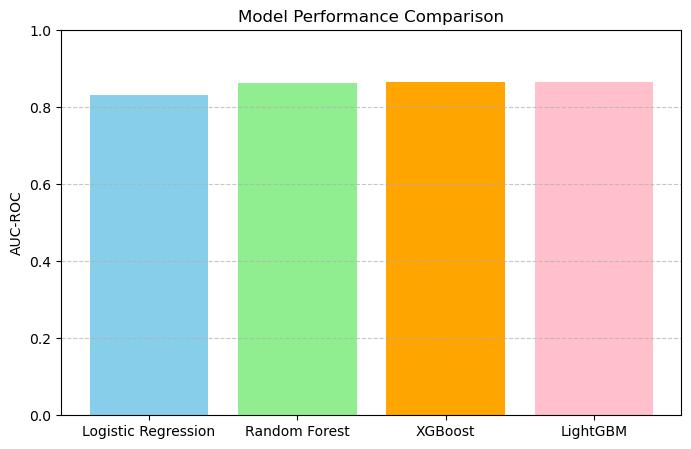

Plot saved successfully!


In [29]:

# graph plot
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']
auc_scores = [log_auc, rf_auc, xgb_auc, lgb_auc]

plt.figure(figsize=(8,5))
plt.bar(models, auc_scores, color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.ylim(0,1)
plt.ylabel('AUC-ROC')
plt.title('Model Performance Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(r"C:\Users\subin\OneDrive\Desktop\EVO\DA & EDA\DA & EDA\model_auc_comparison.png", dpi=300, bbox_inches='tight')

plt.show()

print("Plot saved successfully!")

